Ken Furudate

In [ ]:
library(reshape2)
library(ggplot2)

In [ ]:
in_f1 = "estimate.txt"      

In [ ]:
set.seed(42)
data <- read.table(in_f1, header=TRUE, row.names=1, sep="\t", quote="", stringsAsFactors = FALSE)
data

,Stromal_score,Immune_score,ESTIMATE_score,LNM
TCGA-UF-A7JO-01A,-287.96,1678.94,1390.98,0
TCGA-CN-4733-01A,1181.24,2370.41,3551.65,1
TCGA-CQ-7069-01A,-371.40,-35.44,-406.85,0
TCGA-P3-A6T5-01A,-384.06,104.19,-279.87,0
TCGA-CV-5439-01A,-1217.83,358.81,-859.01,1
...,...,...,...,...
TCGA-HD-7832-01A,-753.29,346.74,-406.54,0
TCGA-BA-A6DE-01A,-1175.29,-262.40,-1437.69,0
TCGA-BB-A6UO-01A,-38.53,154.55,116.02,1
TCGA-CQ-A4CE-01A,-987.78,239.88,-747.90,0


In [ ]:
data.melt <- reshape2::melt(data, 
                            id.vars="LNM", 
                            value.name="Score", 
                            na.rm=TRUE, 
                            stringsAsFactors = FALSE
                            )
data.melt$LNM <- as.character(data.melt$LNM)
head(data.melt)

  LNM      variable    Score
1   0 Stromal_score  -287.96
2   1 Stromal_score  1181.24
3   0 Stromal_score  -371.40
4   0 Stromal_score  -384.06
5   1 Stromal_score -1217.83
6   1 Stromal_score   816.70


[1] "ESTIMATE_score"

	Wilcoxon rank sum test with continuity correction

data:  mat_$Score by mat_$LNM
W = 4943, p-value = 0.9971
alternative hypothesis: true location shift is not equal to 0
95 percent confidence interval:
 -406.1000  400.6799
sample estimates:
difference in location 
             -1.613426 

[1] "Stromal_score"

	Wilcoxon rank sum test with continuity correction

data:  mat_$Score by mat_$LNM
W = 4917, p-value = 0.9463
alternative hypothesis: true location shift is not equal to 0
95 percent confidence interval:
 -249.37  205.59
sample estimates:
difference in location 
             -8.484957 

[1] "Immune_score"

	Wilcoxon rank sum test with continuity correction

data:  mat_$Score by mat_$LNM
W = 5010, p-value = 0.8744
alternative hypothesis: true location shift is not equal to 0
95 percent confidence interval:
 -203.15  247.47
sample estimates:
difference in location 
              20.87748 



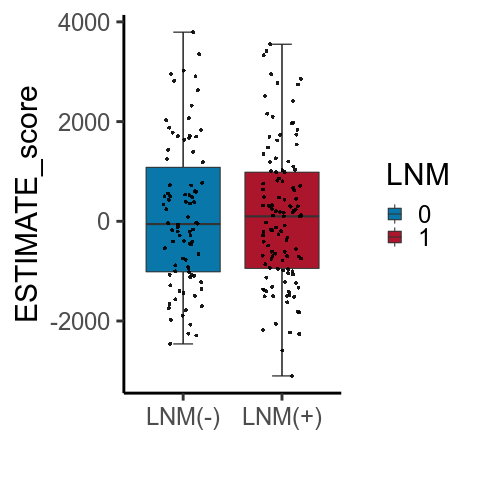

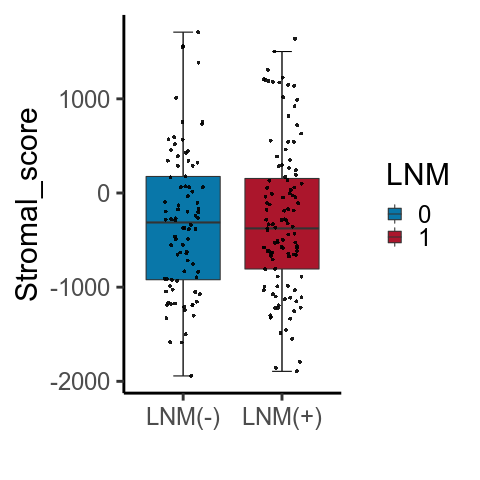

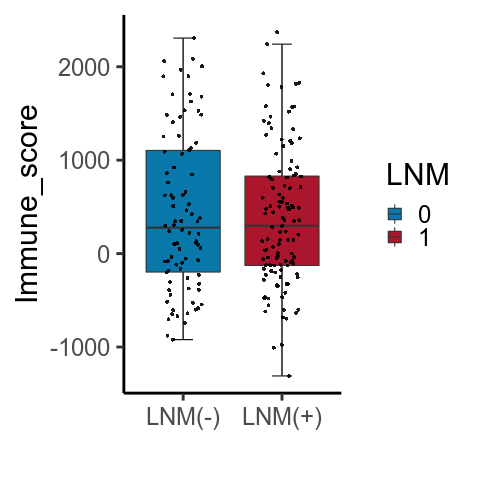

In [ ]:
anot_cols <- c("#0977a9", "#ab162c")
select.col_names <- c("ESTIMATE_score", "Stromal_score", "Immune_score")

for (i in 1:length(select.col_names)){
	col_ <- select.col_names[i]
	print(col_)
	mat_ <- data.melt[data.melt$variable==col_,]
  ggplot()+theme_set(theme_classic(base_size = 30, base_family = "Arial"))
	p <- ggplot(mat_,
				aes(x=LNM, 
            y=Score), 
				    fill=LNM
            ) +
        stat_boxplot(geom = "errorbar", 
                     width = 0.2
                    ) +
        geom_boxplot(aes(fill=LNM), 
                     outlier.colour=NA, alpha=1.0
                    ) +
        geom_jitter(aes(col=LNM), 
                    position=position_jitter(0.2), 
                    shape=16, 
                    alpha=0.9, 
                    color="Black"
                    ) +
		    labs(x="", y=select.col_names[i]) +
		    scale_fill_manual(values=anot_cols) +
		    scale_colour_manual(values=anot_cols) +
		    scale_x_discrete(limits=c("0", "1"),
				                labels=c("LNM(-)", "LNM(+)")
                        )
	print(p)

	res_ = wilcox.test(mat_$Score~mat_$LNM,
					  alternative = "two.sided",
					  paired=F,
					  conf.int=T,
					  conf.level=0.95,
					  exact=F
					  )
	print(res_)
}